# EDA for PubMed Article Summarization Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from collections import Counter
from tqdm.notebook import tqdm
tqdm.pandas()

C:\Users\PARTHA\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Download required nltk models
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
# Load dataset
df = pd.read_csv("PubMed Abstract Summarization Dataset/train.csv",nrows=50000)

In [41]:
df.shape

(50000, 2)

In [42]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   48871 non-null  object
 1   abstract  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [43]:
df.head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...


In [44]:
df.describe(include='all')

,article,abstract
count,48871,50000
unique,48766,49982
top,\n,these are peer - reviewed poster - platform su...
freq,45,5


In [45]:
# Initial stats
df.dropna(subset=["article", "abstract"], inplace=True)
df["article"] = df["article"].astype(str)
df["abstract"] = df["abstract"].astype(str)

In [46]:
# Derived columns
df["article_word_count"] = df["article"].progress_apply(lambda x: len(word_tokenize(x)))
df["abstract_word_count"] = df["abstract"].progress_apply(lambda x: len(word_tokenize(x)))
df["article_len_chars"] = df["article"].progress_apply(len)
df["abstract_len_chars"] = df["abstract"].progress_apply(len)
df["abstract_ratio"] = df["abstract_word_count"] / df["article_word_count"]
df["article_sentence_count"] = df["article"].progress_apply(lambda x: len(sent_tokenize(x)))
df["abstract_sentence_count"] = df["abstract"].progress_apply(lambda x: len(sent_tokenize(x)))

  0%|          | 0/48871 [00:00<?, ?it/s]

  0%|          | 0/48871 [00:00<?, ?it/s]

  0%|          | 0/48871 [00:00<?, ?it/s]

  0%|          | 0/48871 [00:00<?, ?it/s]

  0%|          | 0/48871 [00:00<?, ?it/s]

  0%|          | 0/48871 [00:00<?, ?it/s]

In [47]:
df.describe()

,article_word_count,abstract_word_count,article_len_chars,abstract_len_chars,abstract_ratio,article_sentence_count,abstract_sentence_count
count,48871.000000,48871.000000,48871.000000,48871.000000,4.887100e+04,48871.000000,48871.000000
mean,3157.293037,204.879049,17959.782018,1233.509300,inf,98.726484,7.338626
std,2651.860933,80.089588,14301.335741,459.656901,NaN,71.078022,3.091640
min,0.000000,43.000000,3.000000,205.000000,1.262324e-03,0.000000,1.000000
25%,1538.000000,143.000000,8925.000000,886.000000,5.012525e-02,51.000000,5.000000
50%,2644.000000,211.000000,15131.000000,1279.000000,7.625075e-02,84.000000,7.000000
75%,4071.000000,266.000000,23160.500000,1581.000000,1.120815e-01,127.000000,9.000000
max,146922.000000,807.000000,712726.000000,4340.000000,inf,2868.000000,25.000000


In [48]:
sns.set(style="whitegrid")

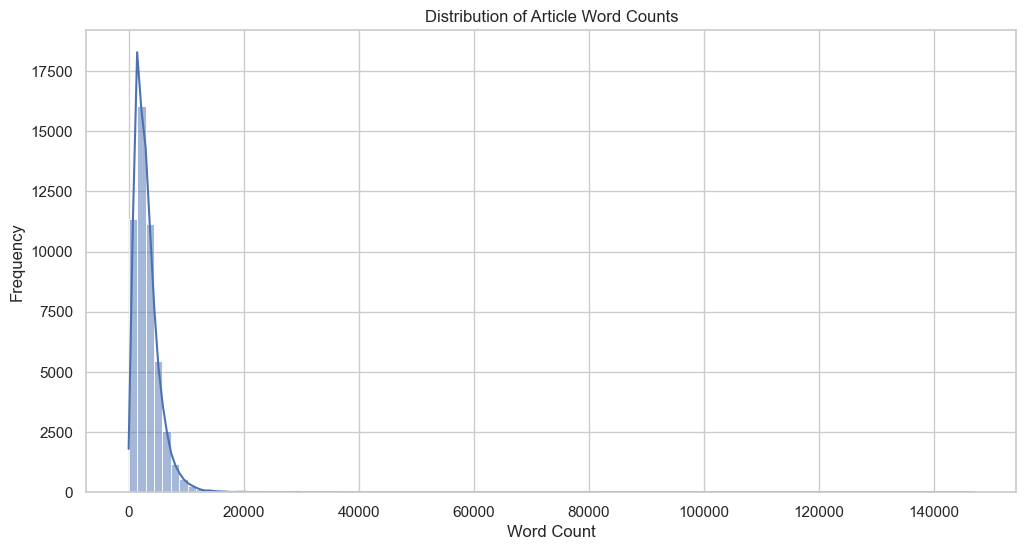

In [49]:
# Distribution of Article Word Counts
plt.figure(figsize=(12, 6))
sns.histplot(df["article_word_count"], bins=100, kde=True)
plt.title("Distribution of Article Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

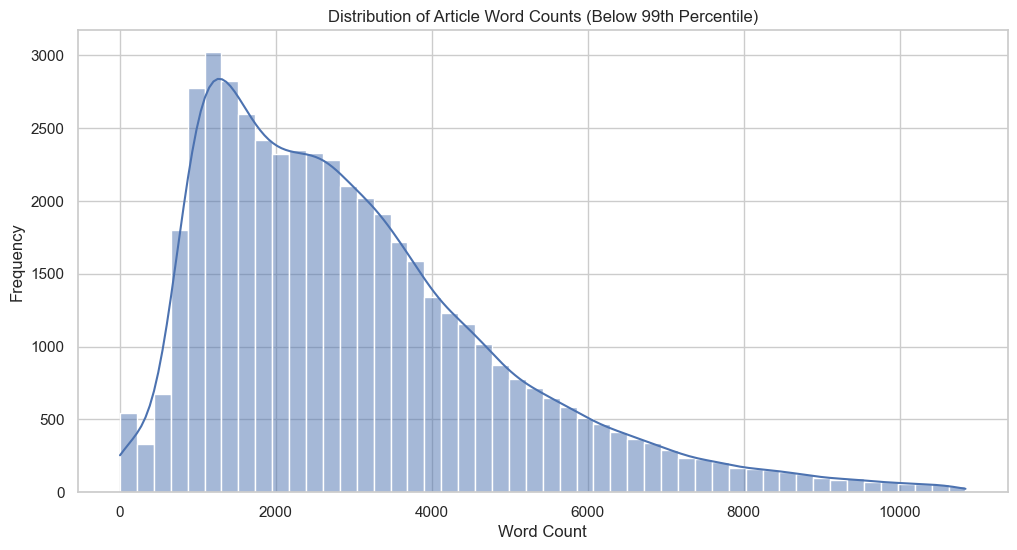

In [71]:
# Distribution of Article Word Counts excluding top 1% outliers to make plot readable
trimmed = df[df["article_word_count"] < df["article_word_count"].quantile(0.99)]
plt.figure(figsize=(12, 6))
sns.histplot(trimmed["article_word_count"], bins=50, kde=True)
plt.title("Distribution of Article Word Counts (Below 99th Percentile)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


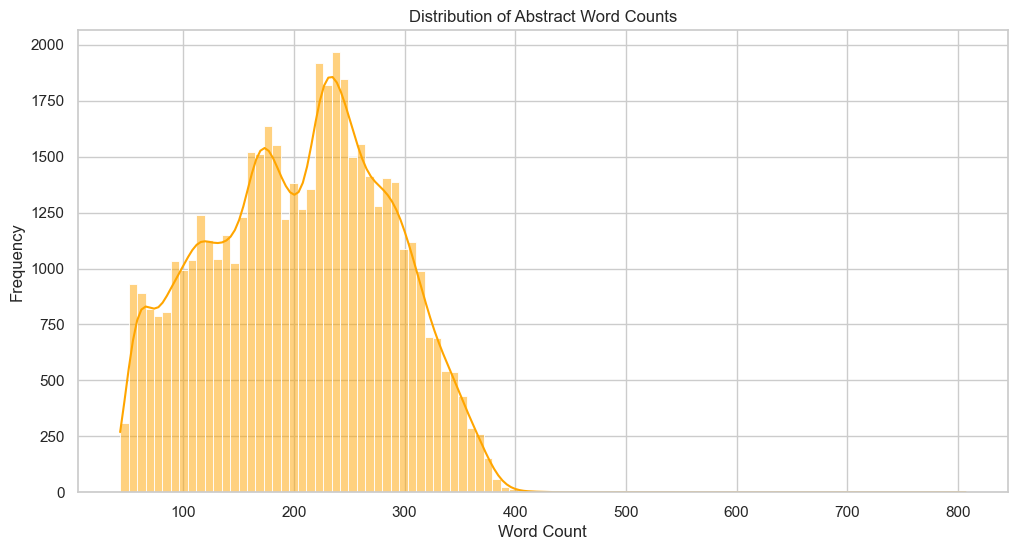

In [51]:
# Distribution of Abstract Word Counts
plt.figure(figsize=(12, 6))
sns.histplot(df["abstract_word_count"], bins=100, kde=True, color="orange")
plt.title("Distribution of Abstract Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

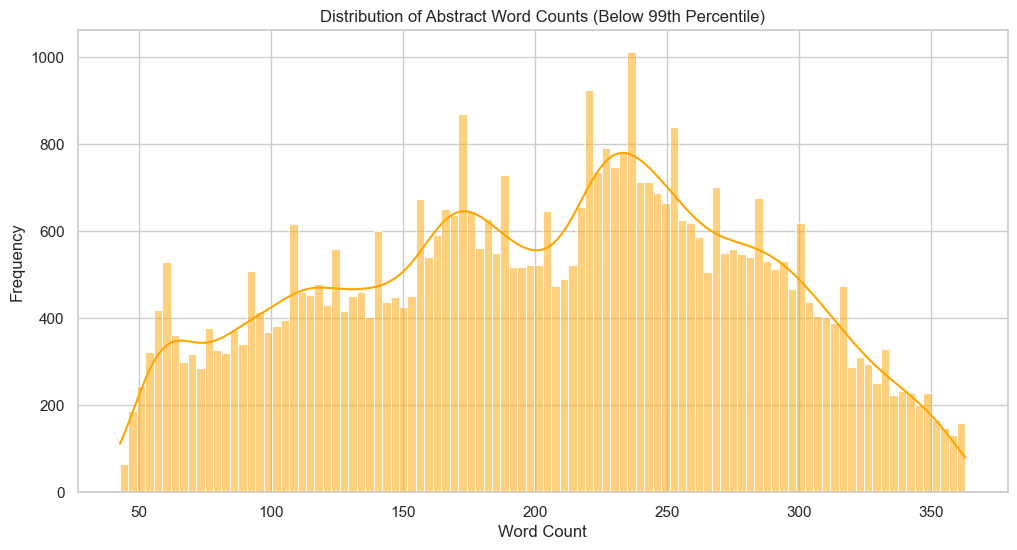

In [65]:
# Distribution of Abstract Word Counts excluding top 1% outliers to make plot readable
trimmed = df[df["abstract_word_count"] < df["abstract_word_count"].quantile(0.99)]
plt.figure(figsize=(12, 6))
sns.histplot(trimmed["abstract_word_count"], bins=100, kde=True, color="orange")
plt.title("Distribution of Abstract Word Counts (Below 99th Percentile)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

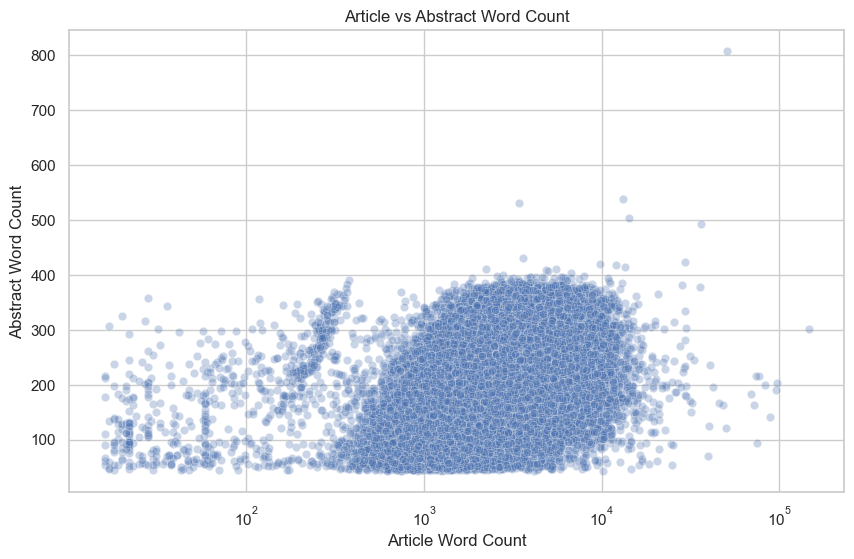

In [56]:
# Article vs Abstract Word Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x="article_word_count", y="abstract_word_count", data=df, alpha=0.3)
plt.title("Article vs Abstract Word Count")
plt.xlabel("Article Word Count")
plt.ylabel("Abstract Word Count")
plt.xscale("log")
plt.show()

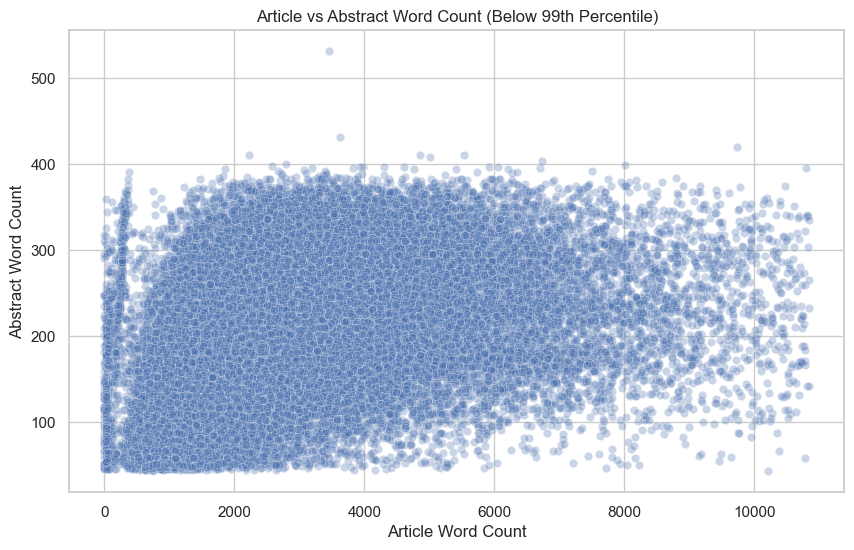

In [67]:
# Article vs Abstract Word Count excluding top 1% outliers to make plot readable
cutoff = df["article_word_count"].quantile(0.99)
trimmed_df = df[df["article_word_count"] < cutoff]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="article_word_count", y="abstract_word_count", data=trimmed_df, alpha=0.3)
plt.title("Article vs Abstract Word Count (Below 99th Percentile)")
plt.xlabel("Article Word Count")
plt.ylabel("Abstract Word Count")
plt.show()


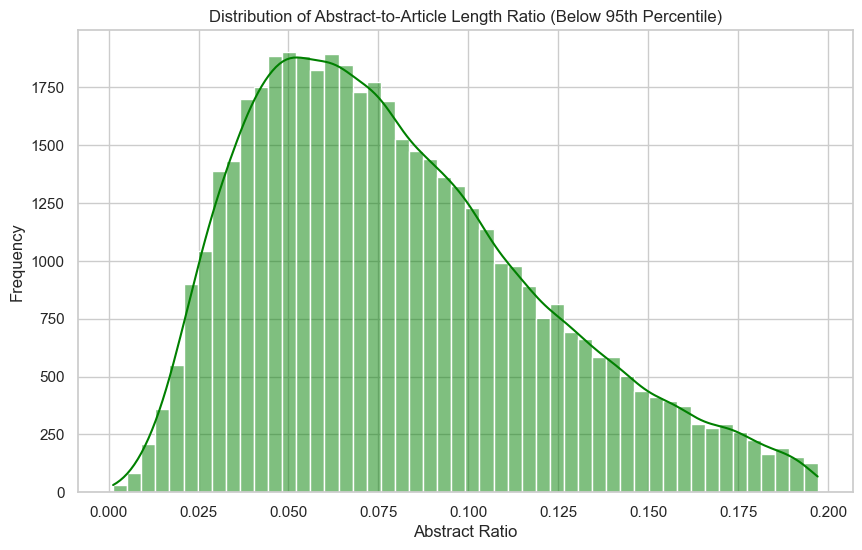

In [68]:
# Distribution of Abstract-to-Article Length Ratio excluding top 5% outliers
threshold = df["abstract_ratio"].quantile(0.95)
trimmed = df[df["abstract_ratio"] <= threshold]

plt.figure(figsize=(10, 6))
sns.histplot(trimmed["abstract_ratio"], bins=50, kde=True, color="green")
plt.title("Distribution of Abstract-to-Article Length Ratio (Below 95th Percentile)")
plt.xlabel("Abstract Ratio")
plt.ylabel("Frequency")
plt.show()


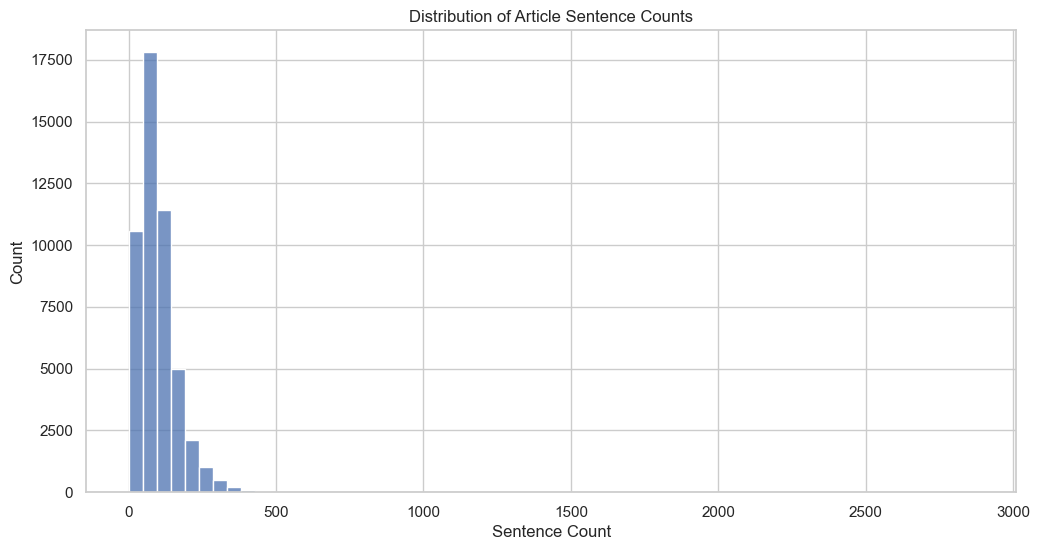

In [17]:
# Sentence Count Distribution

#Distribution of Article Sentence Counts
plt.figure(figsize=(12, 6))
sns.histplot(df["article_sentence_count"], bins=60)
plt.title("Distribution of Article Sentence Counts")
plt.xlabel("Sentence Count")
plt.show()

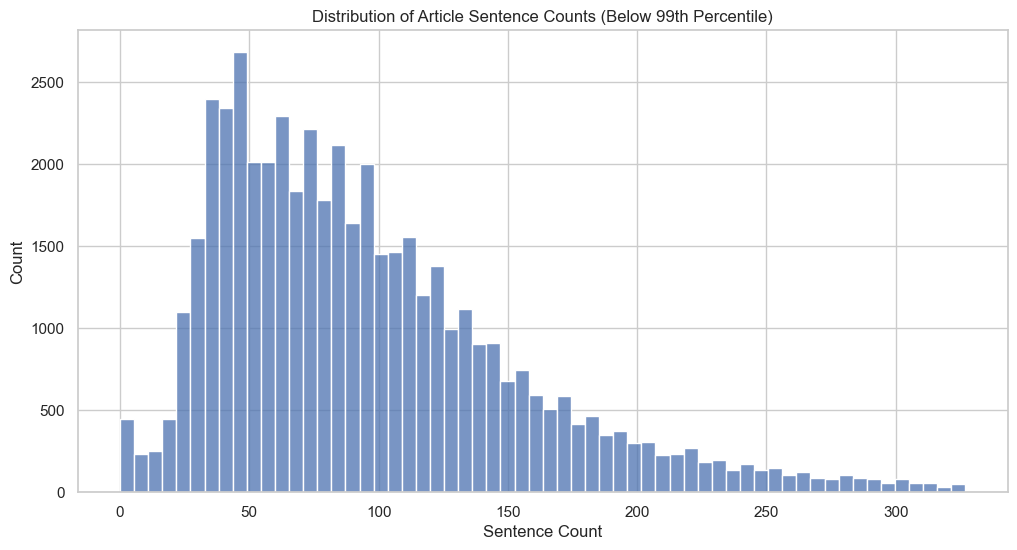

In [69]:
# Distribution of Article Sentence Counts excluding top 1% outliers
threshold = df["article_sentence_count"].quantile(0.99)
trimmed = df[df["article_sentence_count"] <= threshold]
plt.figure(figsize=(12, 6))
sns.histplot(trimmed["article_sentence_count"], bins=60)
plt.title("Distribution of Article Sentence Counts (Below 99th Percentile)")
plt.xlabel("Sentence Count")
plt.show()

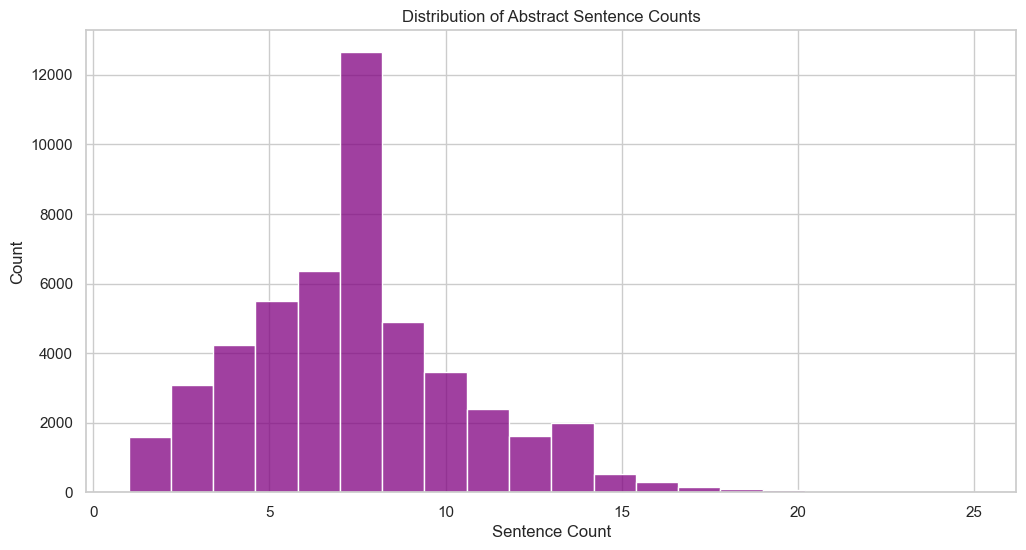

In [77]:
# Distribution of Abstract Sentence Counts
plt.figure(figsize=(12, 6))
sns.histplot(df["abstract_sentence_count"], bins=20, color="purple")
plt.title("Distribution of Abstract Sentence Counts")
plt.xlabel("Sentence Count")
plt.show()

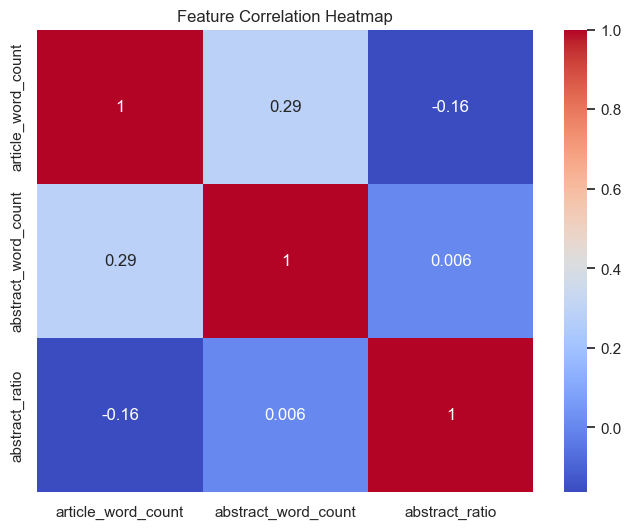

In [78]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["article_word_count", "abstract_word_count", "abstract_ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Word clouds
all_article_words = ' '.join(df['article'].sample(500).values)
all_abstract_words = ' '.join(df['abstract'].sample(500).values)

article_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_article_words)
abstract_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_abstract_words)

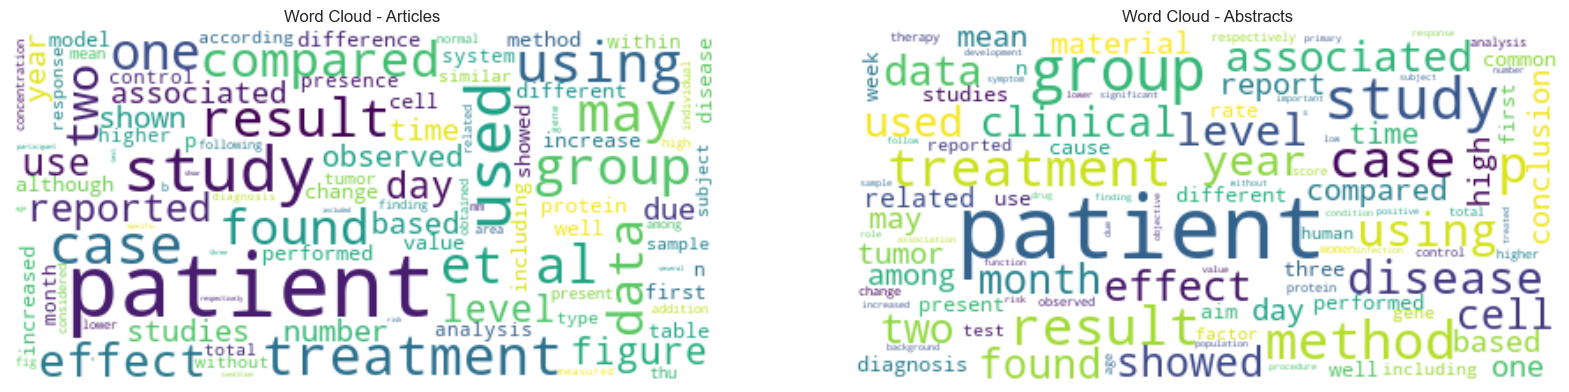

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(article_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Articles")

plt.subplot(1, 2, 2)
plt.imshow(abstract_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Abstracts")
plt.show()

In [22]:
# Top frequent terms in abstracts and articles (excluding stopwords and punctuation)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\PARTHA\AppData\Local\Temp\ipykernel_26368\1430438748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_article_words, x='frequency', y='word', palette='Greens_d')


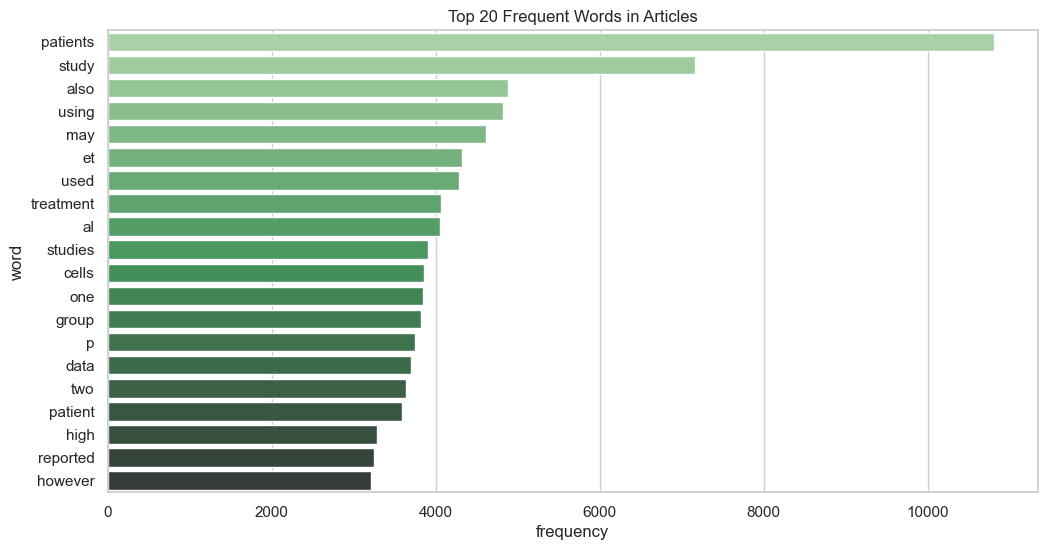

In [79]:
article_sample = ' '.join(df['article'].sample(1000)).lower()
article_words = [word for word in word_tokenize(article_sample) if word.isalpha() and word not in stop_words]
article_word_freq = Counter(article_words)

# Get top 20 frequent words
common_article_words = pd.DataFrame(article_word_freq.most_common(20), columns=['word', 'frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=common_article_words, x='frequency', y='word', palette='Greens_d')
plt.title("Top 20 Frequent Words in Articles")
plt.show()

In [23]:
abstract_words = ' '.join(df['abstract'].sample(1000)).lower()
words = [word for word in word_tokenize(abstract_words) if word.isalpha() and word not in stop_words]
word_freq = Counter(words)

C:\Users\PARTHA\AppData\Local\Temp\ipykernel_26368\2196403455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, x='frequency', y='word', palette='Blues_d')


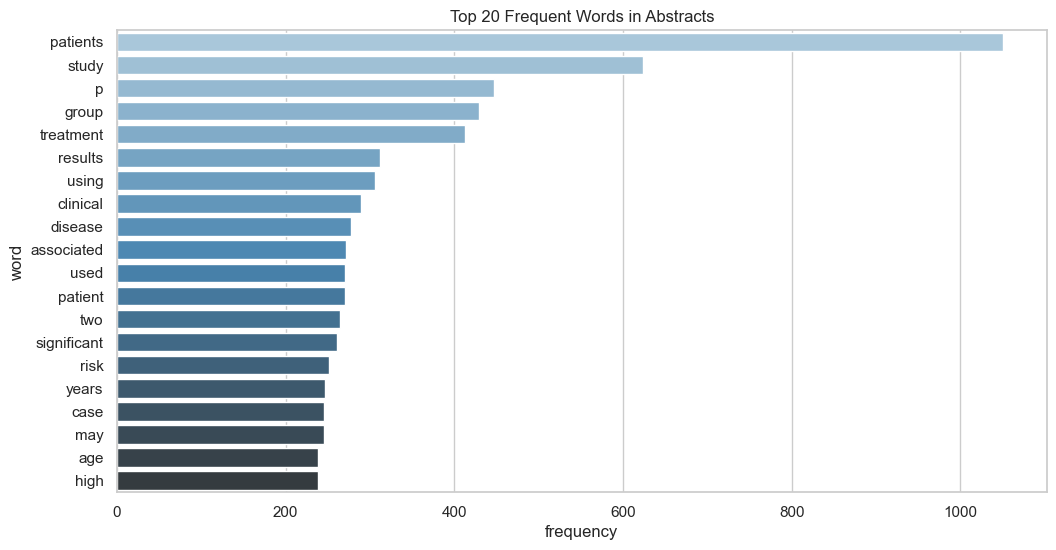

In [24]:
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words, x='frequency', y='word', palette='Blues_d')
plt.title("Top 20 Frequent Words in Abstracts")
plt.show()